# Example 1-1. Training and running a linear model using Scikit-Learn


In [1]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

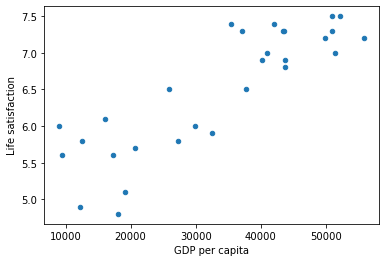

[[5.96242338]]


In [4]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [6]:
print("Trining:\nInputs", X,"\n output:", y)

Trining:
Inputs [[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]] 
 output: [[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]


In [7]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


## Let me try to predict fdom GDP per captias

In [9]:
lebanon=[[6168.00]]
qatar=[[62100.00]]

print("Predicted 'hapiness': \nLevanon:", model.predict(lebanon),"\nQatar:", model.predict(qatar))

Predicted 'hapiness': 
Levanon: [[5.15599687]] 
Qatar: [[7.90312199]]


No comment :)

# Book questions
Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).
A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.
The two most common supervised tasks are regression and classification.
Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.
Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semisupervised learning problem, but it would be less natural.
If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.
Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).
An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance’s features into the model’s prediction function, using the parameter values found by the learning algorithm.
Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
“If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.
A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
“The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that’s held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.
If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that generalizese worse that you expect)